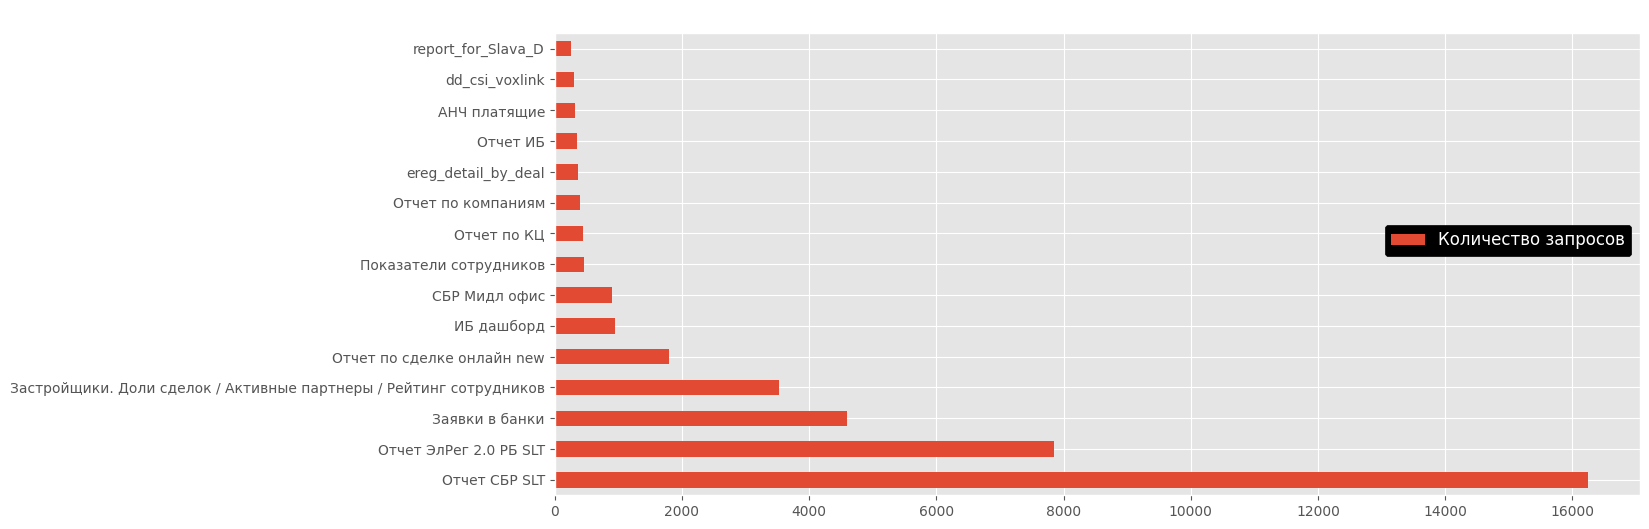

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
#plt.style.use('dark_background')
plt.style.use('ggplot')


df = pd.read_excel('История вып.xlsx')
dt = '2024-01-01'
t = df.query('`Временная метка` >= @dt').groupby(['REPORT NAME'],as_index = False).agg({'Выполнено':'sum'}).sort_values(by='Выполнено', ascending = False).head(15)
ax = t.plot(kind = 'barh', figsize=(14,6))
labels = t['REPORT NAME'].tolist()
ax.set_yticklabels(labels) # .remove
#legend_labels = ['Количество']
legend_colors = ['blue']
ax.legend(['Количество запросов'], loc='lower right', facecolor='black', title_fontsize='12', prop={'size': '12'}, framealpha=1, frameon=True, edgecolor='black', bbox_to_anchor=(1, 0.5))#title='Легенда'
ax.set_title("Top 15 Dashboards 2024")
plt.show()

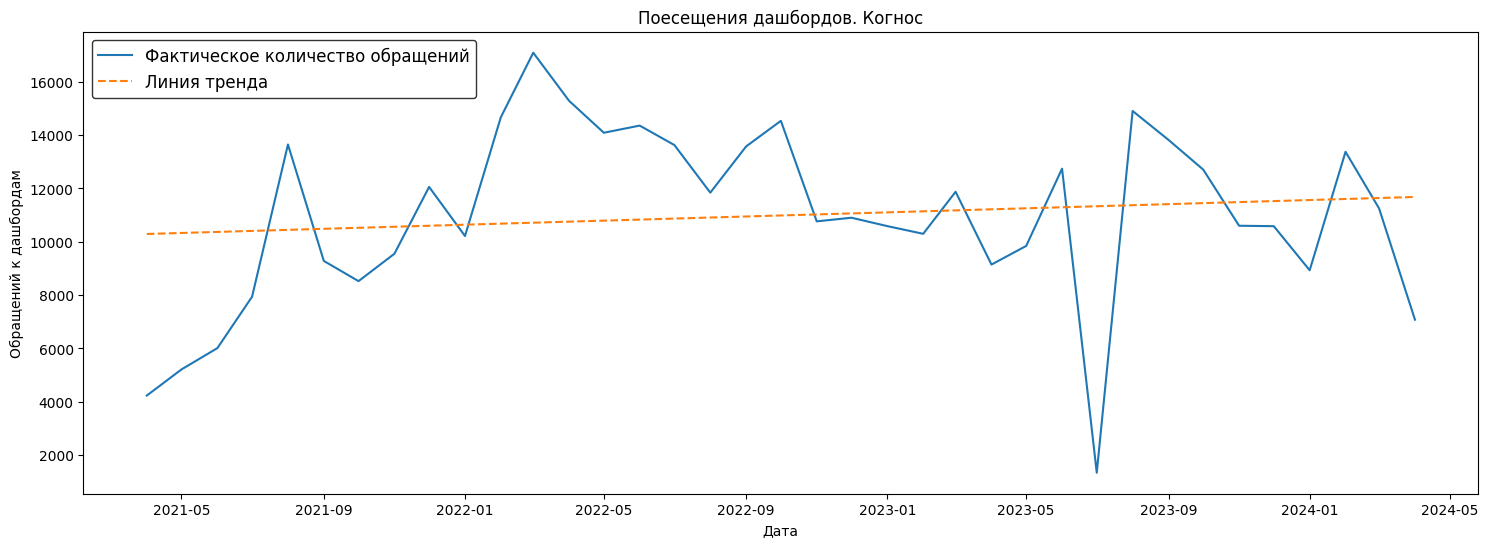

In [16]:
t =df.groupby(df['Временная метка'].dt.to_period('M').dt.to_timestamp())['Выполнено'].sum()

plt.style.use('default')
# Преобразование индекса в числовой формат для линейной регрессии
X = np.array(t.index.to_julian_date())
# Преобразование данных о выполненных обращениях для регрессии
y = np.array(t.values)
# Создание объекта линейной регрессии
regressor = LinearRegression()
# Обучение модели
regressor.fit(X.reshape(-1, 1), y)
# Получение предсказанных значений
y_pred = regressor.predict(X.reshape(-1, 1))
# Построение графика с линией тренда
plt.figure(figsize=(18, 6))
plt.plot(t.index, y, label='Фактическое количество обращений')
plt.plot(t.index, y_pred, label='Линия тренда', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Обращений к дашбордам')
plt.legend(loc='upper left', facecolor='white', edgecolor='black', fontsize='large') 
plt.title("Поесещения дашбордов. Когнос")
plt.grid(False)
plt.show()

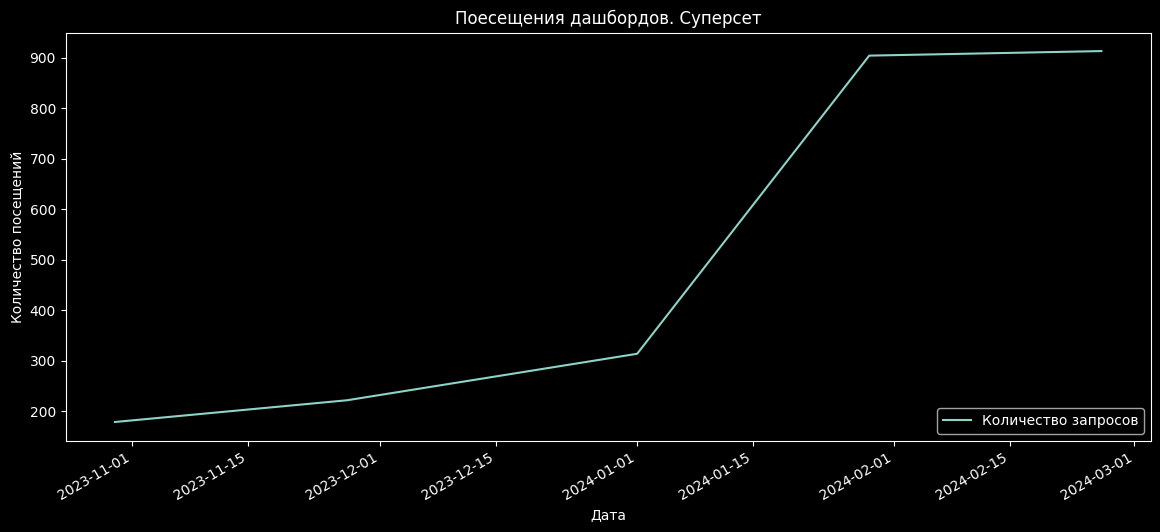

In [37]:
df1 = pd.read_excel('20240325_102909.xlsx')
t1 =df1.groupby(df1['dttm'].dt.to_period('W').dt.to_timestamp())['visits'].sum()
ax1 = t1.plot(kind = 'line', figsize = (14,6))
ax1.set_title("Поесещения дашбордов. Суперсет")
ax1.legend(['Количество запросов'], loc='lower right') #, facecolor='black', title_fontsize=12, prop={'size': 12}, framealpha=1, frameon=True, edgecolor='black', bbox_to_anchor=(1, 0.5)
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество посещений')
plt.show()

In [17]:
df

,Пакет,Тип,Путь поиска отчета,REPORT NAME,Временная метка,Имя пользователя,Выполнено
0,Аудит,Standard report,/content/folder[@name='Аудит - Примеры']/folde...,"Выполнение отчетов, сводных панелей и историй ...",2021-04-08,M2\admdk,2
1,sbr_with_data_sets,Standard report,/content/folder[@name='СБР отчетность']/report...,СБР Мидл офис,2021-04-08,M2\admdk,1
2,sbr_with_data_sets,Standard report,/content/folder[@name='SLT отчетность']/report...,Отчет СБР SLT,2021-04-08,M2\fazylovrr,3
3,sbr_with_data_sets,Standard report,/content/folder[@name='СБР отчетность']/report...,СБР Мидл офис,2021-04-09,M2\agasiankv,5
4,sbr_with_data_sets,Standard report,/content/folder[@name='СБР отчетность']/folder...,sbr_midl_docok_by_empl_m2,2021-04-09,M2\andreevatv,1
...,...,...,...,...,...,...,...
73047,ereg_data_module_on_data_set,Standard report,/content/folder[@name='SLT отчетность']/folder...,ereg_detail_by_deal,2024-04-15,not available,1
73048,sbr_with_data_sets,Standard report,/content/folder[@name='Рассылки']/folder[@name...,report_for_Slava_D,2024-04-15,not available,4
73049,sbr_with_data_sets,Standard report,/content/folder[@name='SLT отчетность']/report...,Отчет СБР SLT,2024-04-15,not available,17
73050,ereg_data_module_on_data_set,Standard report,/content/folder[@name='SLT отчетность']/report...,Отчет ЭлРег 2.0 РБ SLT,2024-04-15,not available,14


In [37]:
per = '2024-03-01'
df.query('`Временная метка` >= @per')['Имя пользователя'].nunique()

109

In [48]:
per = '2023-01-01'
t = df.query('`Временная метка` >= @per').groupby('Имя пользователя')['Выполнено'].sum().reset_index()

t.query('`Выполнено`>=10')['Имя пользователя'].nunique()

178